In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import weibull_min
from scipy.optimize import curve_fit

In [2]:
df_convs = pd.read_csv("data/convs.csv")
# Convert 'hate_score' to numeric
df_convs['hate_score'] = pd.to_numeric(df_convs['hate_score'], errors='coerce')
# Convert 'conversation_size' to numeric
df_convs['conversation_size'] = pd.to_numeric(df_convs['conversation_size'], errors='coerce')
# Convert 'number_of_users' to numeric
df_convs['number_users'] = pd.to_numeric(df_convs['number_users'], errors='coerce')
# Convert 'hateful_replies' to numeric
df_convs['hateful_replies'] = pd.to_numeric(df_convs['hateful_replies'], errors='coerce')


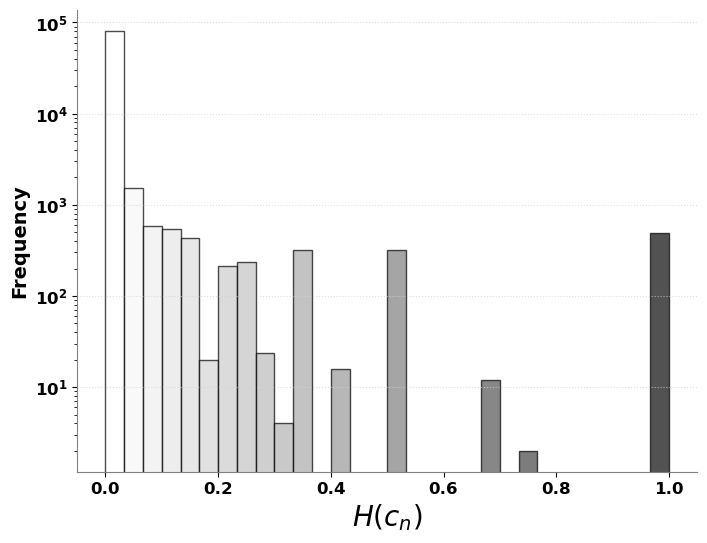

In [ ]:
# FIGURE 4A (Y Axis in Logscale)

# Extracting the 'a_i' column
data = df_convs['hate_score']

# Creating the histogram with a monochrome color scheme, smaller bucket size, and log scale for the y-axis
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(data, bins=30, color='grey', alpha=0.7, edgecolor='black')

# Adjusting color gradient to be more transparent
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.binary(i/len(patches), alpha=0.5))  # Reduced alpha here

# Adding labels with LaTeX formatting for subscript, increased size, and bold font
plt.xlabel('$H(c_{n})$', fontsize=24, fontweight='bold')
plt.ylabel('Frequency', fontsize=18, fontweight='bold')

# Setting y-axis to logarithmic scale
plt.yscale('log')

# Adding a grid for better readability, setting it to light grey and dotted
plt.grid(axis='y', alpha=0.75, color='lightgrey', linestyle=':')

# Setting tick colors to grey, increasing label size, and making them bold
plt.gca().tick_params(axis='both', which='both', colors='grey', labelsize=16)
for label in (plt.gca().get_xticklabels() + plt.gca().get_yticklabels()):
    label.set_fontsize(16)
    label.set_fontweight('bold')
    label.set_color('grey')

# Removing top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')

# Remove the title
plt.title('')

# Save the plot as a PDF file in the 'result' folder
plt.savefig('result/figure_4/figure_4a_ylog.pdf')

# Show the plot
plt.show()

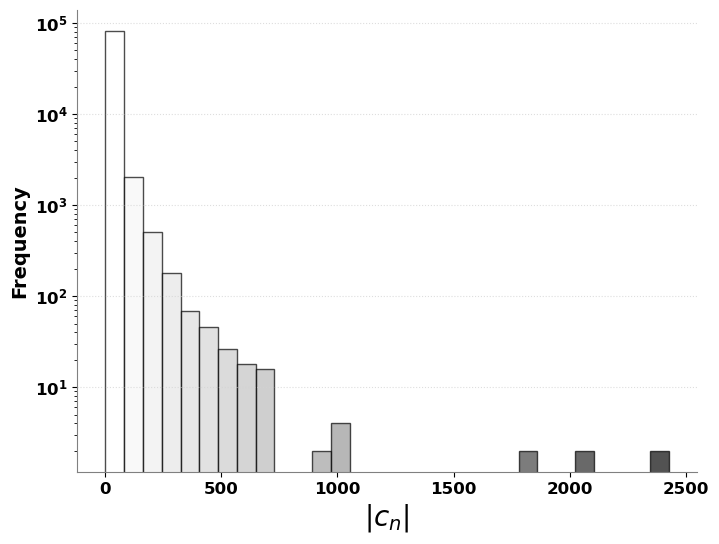

In [ ]:
# FIGURE 4B (Y Axis in Logscale)

# Extracting the 'a_i' column
data = df_convs['conversation_size']

# Creating the histogram with a monochrome color scheme, smaller bucket size, and log scale for the y-axis
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(data, bins=30, color='grey', alpha=0.7, edgecolor='black')

# Adjusting color gradient to be more transparent
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.binary(i/len(patches), alpha=0.5))  # Reduced alpha here

# Adding labels with LaTeX formatting for subscript, increased size, and bold font
plt.xlabel('$|c_{n}|$', fontsize=24, fontweight='bold')
plt.ylabel('Frequency', fontsize=18, fontweight='bold')

# Setting y-axis to logarithmic scale
plt.yscale('log')

# Adding a grid for better readability, setting it to light grey and dotted
plt.grid(axis='y', alpha=0.75, color='lightgrey', linestyle=':')

# Setting tick colors to grey, increasing label size, and making them bold
plt.gca().tick_params(axis='both', which='both', colors='grey', labelsize=16)
for label in (plt.gca().get_xticklabels() + plt.gca().get_yticklabels()):
    label.set_fontsize(16)
    label.set_fontweight('bold')
    label.set_color('grey')

# Removing top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')

# Remove the title
plt.title('')

# Save the plot as a PDF file in the 'result' folder
plt.savefig('result/figure_4/figure_4b_ylog.pdf')

# Show the plot
plt.show()

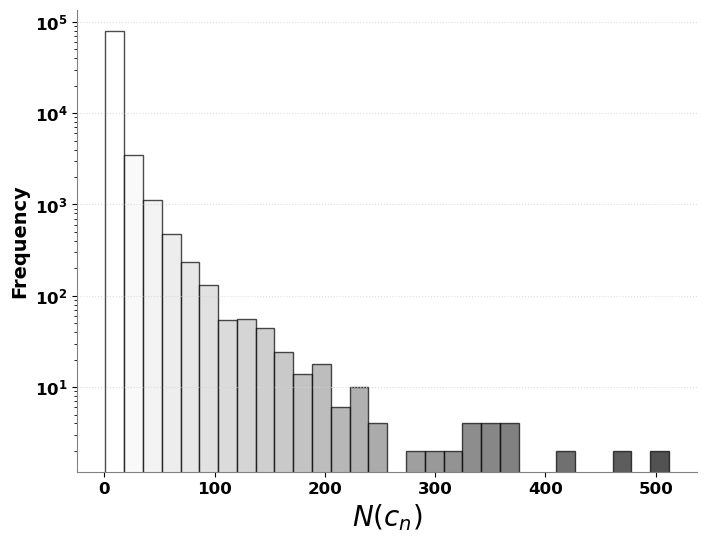

In [ ]:
# FIGURE 4C (Y Axis in Logscale)

# Extracting the 'a_i' column
data = df_convs['number_of_nodes']

# Creating the histogram with a monochrome color scheme, smaller bucket size, and log scale for the y-axis
plt.figure(figsize=(8, 6))
n, bins, patches = plt.hist(data, bins=30, color='grey', alpha=0.7, edgecolor='black')

# Adjusting color gradient to be more transparent
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.binary(i/len(patches), alpha=0.5))  # Reduced alpha here

# Adding labels with LaTeX formatting for subscript, increased size, and bold font
plt.xlabel('$N(c_{n})$', fontsize=24, fontweight='bold')
plt.ylabel('Frequency', fontsize=18, fontweight='bold')

# Setting y-axis to logarithmic scale
plt.yscale('log')

# Adding a grid for better readability, setting it to light grey and dotted
plt.grid(axis='y', alpha=0.75, color='lightgrey', linestyle=':')

# Setting tick colors to grey, increasing label size, and making them bold
plt.gca().tick_params(axis='both', which='both', colors='grey', labelsize=16)
for label in (plt.gca().get_xticklabels() + plt.gca().get_yticklabels()):
    label.set_fontsize(16)
    label.set_fontweight('bold')
    label.set_color('grey')

# Removing top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')

# Remove the title
plt.title('')

# Save the plot as a PDF file in the 'result' folder
plt.savefig('result/figure_4/figure_4c_ylog.pdf')

# Show the plot
plt.show()

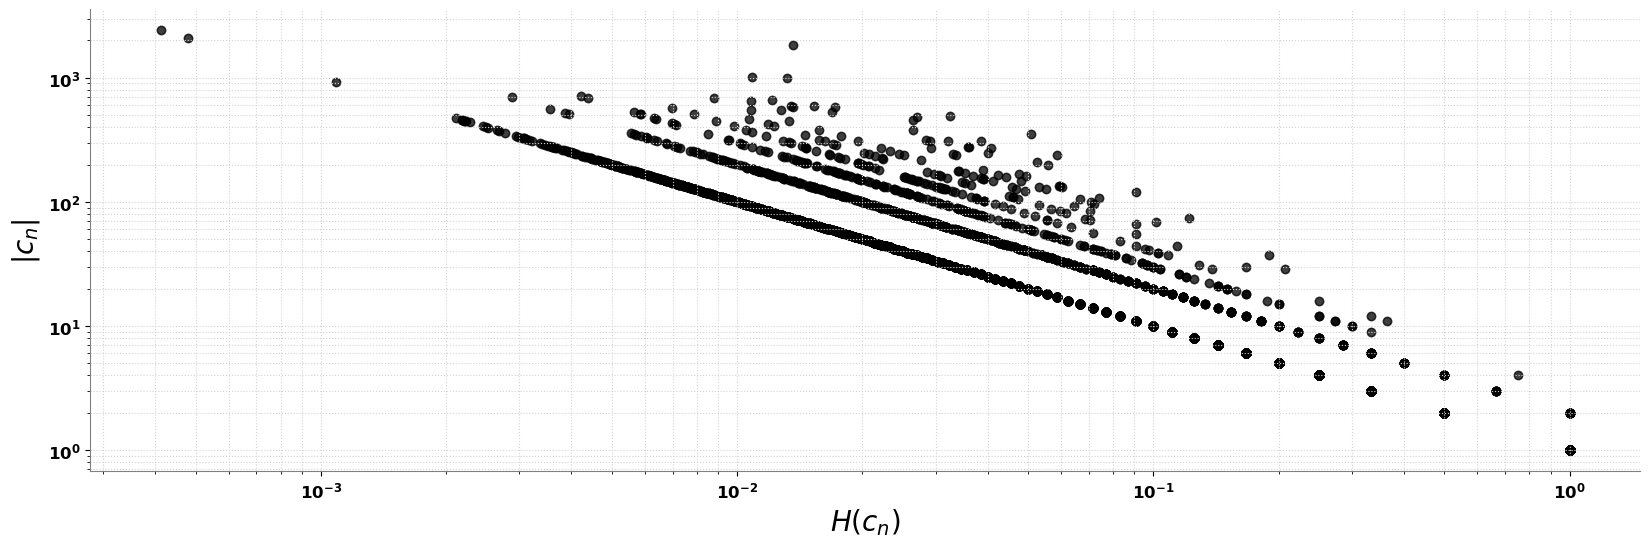

In [ ]:
# FIGURE 4D (Y Axis in Logscale)


# Data for plotting
x = df_convs['hate_score']
y = df_convs['conversation_size']

# Filtering out non-positive values for log transformation
# Ensuring only positive values are included for the log scale
x_filtered = x[x >= 0]
y_filtered = y[y >= 0]

# Creating the plot
plt.figure(figsize=(20, 6))
plt.scatter(x_filtered, y_filtered, color='black', alpha=0.5)  # Adjust alpha for transparency

# Setting both axes to logarithmic scale
plt.xscale('log')
plt.yscale('log')

# Adding labels with LaTeX formatting for subscript, increasing size, and making them bold
plt.xlabel('$H(c_{n})$', fontsize=24, fontweight='bold')
plt.ylabel('$|c_{n}|$', fontsize=24, fontweight='bold')

# Adding a grid for better readability, setting it to light grey and dotted
plt.grid(True, which="both", ls=":", color='lightgrey')

# Removing top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')

# Setting tick colors to grey, increasing label size, and making them bold
for label in (plt.gca().get_xticklabels() + plt.gca().get_yticklabels()):
    label.set_fontsize(16)
    label.set_fontweight('bold')
    label.set_color('grey')

# Remove the title
plt.title('')

# Save the plot as a PDF file in the 'result' folder
plt.savefig('result/figure_4/figure_4d_xlog_ylog.pdf')

# Show the plot
plt.show()

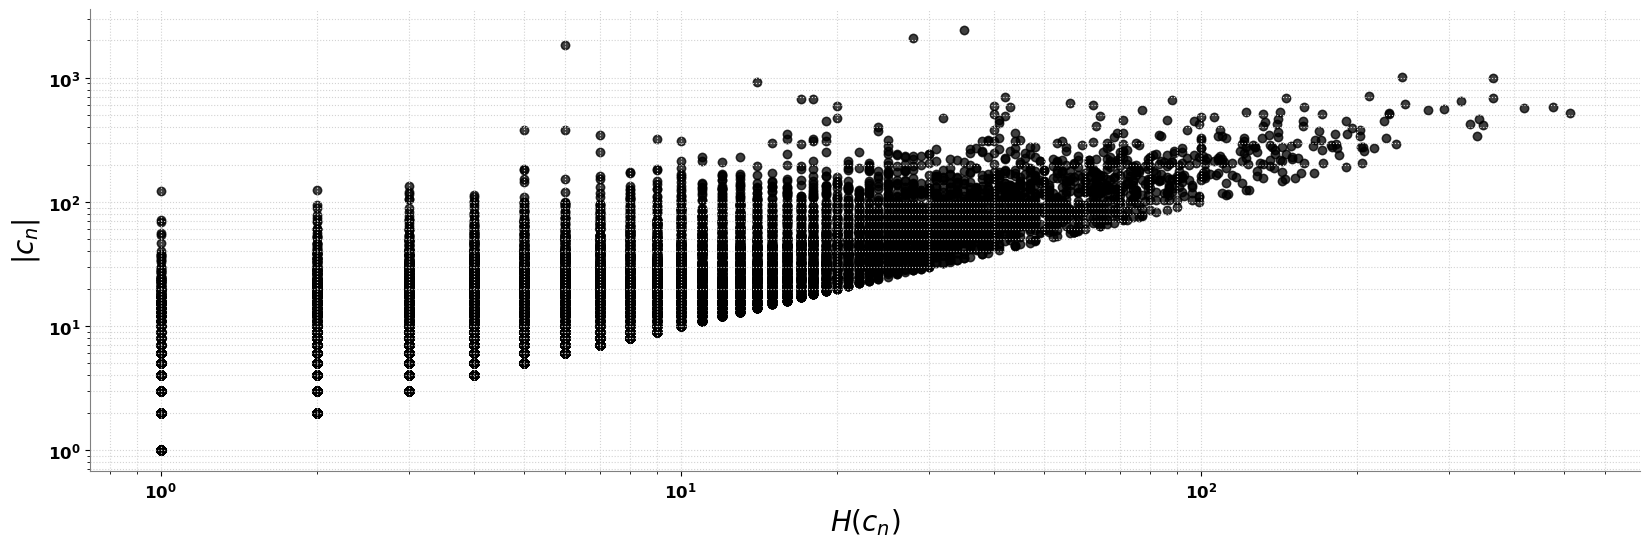

In [ ]:
# FIGURE 4E (Y Axis in Logscale)


# Data for plotting
x = df_convs['number_users']
y = df_convs['conversation_size']

# Filtering out non-positive values for log transformation
# Ensuring only positive values are included for the log scale
x_filtered = x[x >= 0]
y_filtered = y[y >= 0]

# Creating the plot
plt.figure(figsize=(20, 6))
plt.scatter(x_filtered, y_filtered, color='black', alpha=0.5)  # Adjust alpha for transparency

# Setting both axes to logarithmic scale
plt.xscale('log')
plt.yscale('log')

# Adding labels with LaTeX formatting for subscript, increasing size, and making them bold
plt.xlabel('$H(c_{n})$', fontsize=24, fontweight='bold')
plt.ylabel('$|c_{n}|$', fontsize=24, fontweight='bold')

# Adding a grid for better readability, setting it to light grey and dotted
plt.grid(True, which="both", ls=":", color='lightgrey')

# Removing top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')

# Setting tick colors to grey, increasing label size, and making them bold
for label in (plt.gca().get_xticklabels() + plt.gca().get_yticklabels()):
    label.set_fontsize(16)
    label.set_fontweight('bold')
    label.set_color('grey')

# Remove the title
plt.title('')

# Save the plot as a PDF file in the 'result' folder
plt.savefig('result/figure_4/figure_4d_xlog_ylog.pdf')

# Show the plot
plt.show()

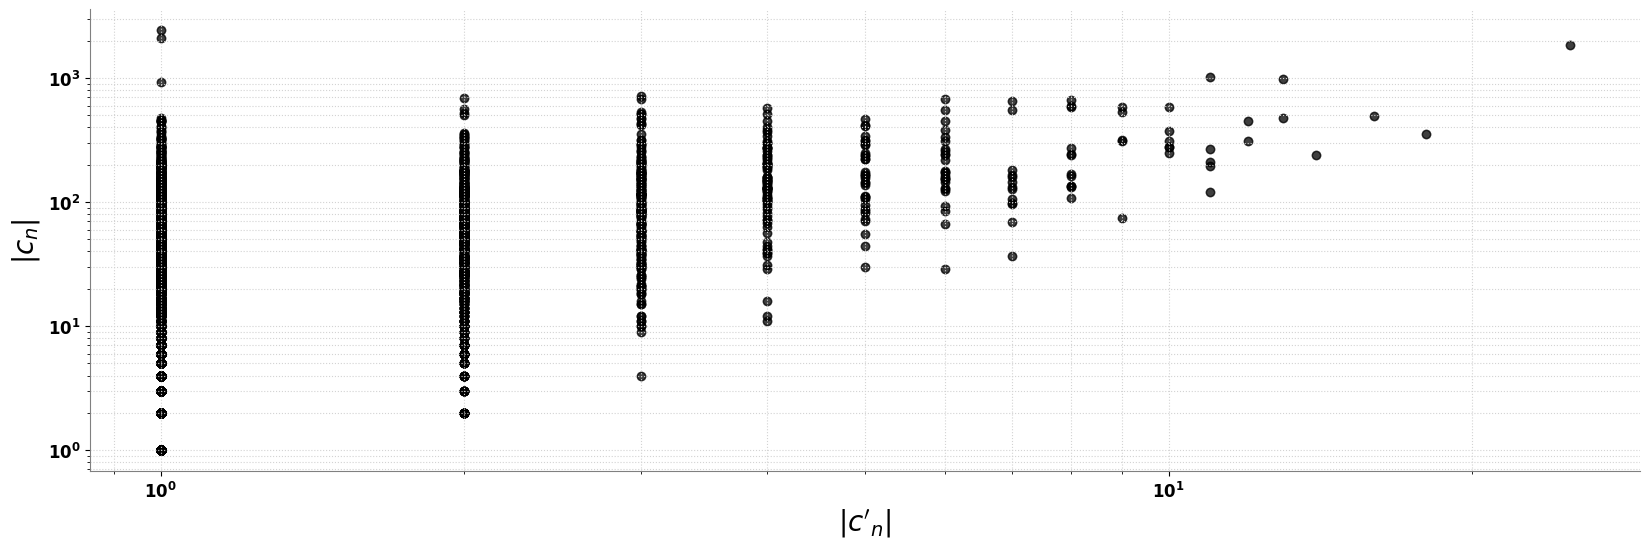

In [ ]:
# FIGURE 4E (Y Axis in Logscale)


# Data for plotting
x = df_convs['hateful_replies']
y = df_convs['conversation_size']

# Filtering out non-positive values for log transformation
# Ensuring only positive values are included for the log scale
x_filtered = x[x >= 0]
y_filtered = y[y >= 0]

# Creating the plot
plt.figure(figsize=(20, 6))
plt.scatter(x_filtered, y_filtered, color='black', alpha=0.5)  # Adjust alpha for transparency

# Setting both axes to logarithmic scale
plt.xscale('log')
plt.yscale('log')

# Adding labels with LaTeX formatting for subscript, increasing size, and making them bold
plt.xlabel("$|c'_{n}|$", fontsize=24, fontweight='bold')
plt.ylabel('$|c_{n}|$', fontsize=24, fontweight='bold')

# Adding a grid for better readability, setting it to light grey and dotted
plt.grid(True, which="both", ls=":", color='lightgrey')

# Removing top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')

# Setting tick colors to grey, increasing label size, and making them bold
for label in (plt.gca().get_xticklabels() + plt.gca().get_yticklabels()):
    label.set_fontsize(16)
    label.set_fontweight('bold')
    label.set_color('grey')

# Remove the title
plt.title('')

# Save the plot as a PDF file in the 'result' folder
plt.savefig('result/figure_4/figure_4e_xlog_ylog.pdf')

# Show the plot
plt.show()

In [ ]:
# FIGURE 4E (Y Axis in Logscale)


# Data for plotting
x = df_convs['hateful_replies']
y = df_convs['conversation_size']

# Filtering out non-positive values for log transformation
# Ensuring only positive values are included for the log scale
x_filtered = x[x >= 0]
y_filtered = y[y >= 0]

# Creating the plot
plt.figure(figsize=(8, 6))
plt.scatter(x_filtered, y_filtered, color='black', alpha=0.5)  # Adjust alpha for transparency

# Setting both axes to logarithmic scale
plt.xscale('log')
plt.yscale('log')

# Adding labels with LaTeX formatting for subscript, increasing size, and making them bold
plt.xlabel("$|c'_{n}|$", fontsize=24, fontweight='bold')
plt.ylabel('$|c_{n}|$', fontsize=24, fontweight='bold')

# Adding a grid for better readability, setting it to light grey and dotted
plt.grid(True, which="both", ls=":", color='lightgrey')

# Removing top and right spines for a cleaner look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_color('grey')
plt.gca().spines['bottom'].set_color('grey')

# Setting tick colors to grey, increasing label size, and making them bold
for label in (plt.gca().get_xticklabels() + plt.gca().get_yticklabels()):
    label.set_fontsize(16)
    label.set_fontweight('bold')
    label.set_color('grey')

# Remove the title
plt.title('')

# Save the plot as a PDF file in the 'result' folder
plt.savefig('result/figure_4/figure_4e_xlog_ylog_new.pdf')

# Show the plot
plt.show()